In [48]:
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import plotly.express as px

sb.set()
data = pd.read_csv("preprocessed.csv")
data.head()

,Unnamed: 0,ap_hi,ap_lo,bmi,age,cholesterol_Above Normal,cholesterol_Normal,cholesterol_Well Above Normal,gluc_Above Normal,gluc_Normal,gluc_Well Above Normal,gender_Female,gender_Male,alco,smoke,active,cardio
0,0,-0.151119,-0.088039,-0.902642,-0.431960,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,0.097746,-0.033406,1.182862,0.309920,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,2,0.014791,-0.142673,-0.654728,-0.244367,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,3,0.180701,0.021227,0.182443,-0.743266,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,4,-0.234074,-0.197306,-0.734641,-0.803506,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


The standard scalar performed in preprocessing creates 'features' with the same scale so that each feature will have a fair
impact on the model i.e (age with a greater range of value may influence model in a certain way). Gradient boost classifier will be used here.

In [49]:
X = data.drop(["cardio", "Unnamed: 0"], axis=1)
y = data.filter(["cardio"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
corr_matrix = data.corr()
print(corr_matrix)

                               Unnamed: 0     ap_hi     ap_lo       bmi  \
Unnamed: 0                       1.000000  0.005692  0.001956 -0.000879   
ap_hi                            0.005692  1.000000  0.020764  0.033168   
ap_lo                            0.001956  0.020764  1.000000  0.032687   
bmi                             -0.000879  0.033168  0.032687  1.000000   
age                              0.003645  0.028689  0.016557  0.084483   
cholesterol_Above Normal         0.000428  0.019139  0.017280  0.063000   
cholesterol_Normal              -0.002816 -0.027991 -0.023936 -0.139821   
cholesterol_Well Above Normal    0.003369  0.017477  0.013962  0.122348   
gluc_Above Normal                0.001609  0.007573  0.008620  0.081909   
gluc_Normal                      0.000420 -0.009260 -0.008938 -0.108179   
gluc_Well Above Normal          -0.002172  0.004980  0.003501  0.064713   
gender_Female                   -0.004761 -0.010413 -0.011181  0.094817   
gender_Male              

Making use of confusion matrix, we can infer that [age] has the strongest relation to [cardio]. Following closedly by [BMI] and
[cholesterol]. We can also see that ap_hi and ap_lo has some influence to the prediction. For binary classifications such as feature
[smoke], a phi coefficient is used instead.

Note: In this analysis, we see smoke having a negative phi coefficient which indicate that individuals who smoke are less likely to have cardiovascular disease and this contradicts exisiting medical knowledge and research.

Therefore we cannot see individual 'features' to predict a outcome. Factors have to be considered in its entirety for maximum
accuracy.

### Using Gradient Boosting Classifier to predict 'Cardio'

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

clf1 = GradientBoostingClassifier(n_estimators=100, max_depth=10, random_state=42) #adjusting the parameters inside untill i get >= 80% accuracy
boost = clf1.fit(X_train, y_train.values.ravel())
importance = clf1.feature_importances_
y_pred_train_GBC = boost.predict(X_train)
y_pred_test_GBC = boost.predict(X_test)
primarytrainscore = clf1.score(X_train, y_train)
primarytestscore = clf1.score(X_test, y_test)

Training Accuracy 	: 0.8490021849963584


<AxesSubplot:>

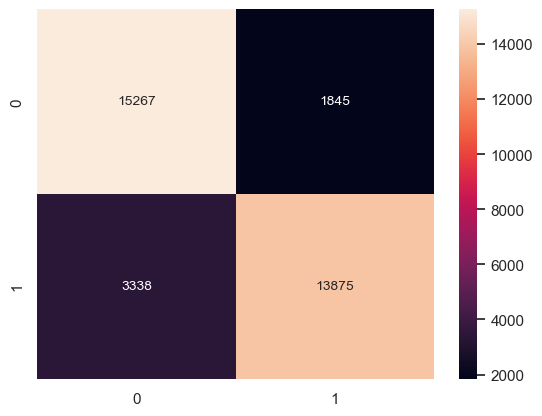

In [52]:
print("Training Accuracy \t:", primarytrainscore)
sb.heatmap(confusion_matrix(y_train, y_pred_train_GBC), annot = True, fmt=".0f", annot_kws={"size": 10})

Test Accuracy 	: 0.7252396166134185


<AxesSubplot:>

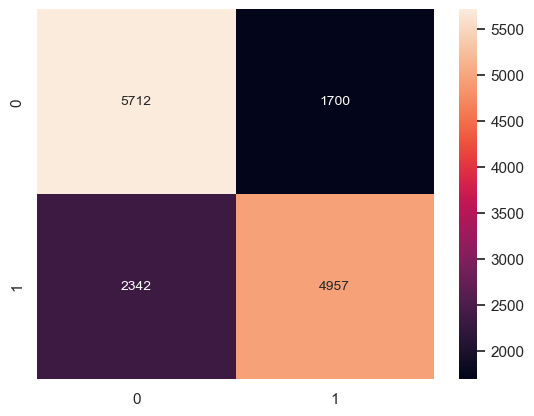

In [53]:
print("Test Accuracy \t:", primarytestscore)
sb.heatmap(confusion_matrix(y_test, y_pred_test_GBC), annot = True, fmt=".0f", annot_kws={"size": 10})

In [54]:
df_importance = pd.DataFrame({'Features': X.columns, 'Importance': importance}) #Create a dataframe for feature-importance
df_importance = df_importance.sort_values(by='Importance', ascending=False) #sort data by importance
fig = px.bar(df_importance, x='Importance', y='Features', orientation='h', title='Feature Importances') #google the parameters to put in
fig.show() #use of ploty allow us to view exact value from graph.

### Prerequisite Condition: Model with high accuracy score of approx. > 80% [Checked]

### Using improved GBC -> Hist Gradient Boost Classifier (HGBC)

In [55]:
from sklearn.ensemble import HistGradientBoostingClassifier

clf2 = HistGradientBoostingClassifier(max_iter=100, max_depth=10, random_state=42) #to make it a fair comparison
clf2.fit(X_train, y_train.values.ravel())
y_pred_test_HGBC = clf2.predict(X_test)
y_pred_train_HGBC = clf2.predict(X_train)
clf2.score(X_test, y_test)
primarytrainscore2 = clf2.score(X_train, y_train)
primarytestscore2 = clf2.score(X_test, y_test)

Training Accuracy 	: 0.7482010196649672


<AxesSubplot:>

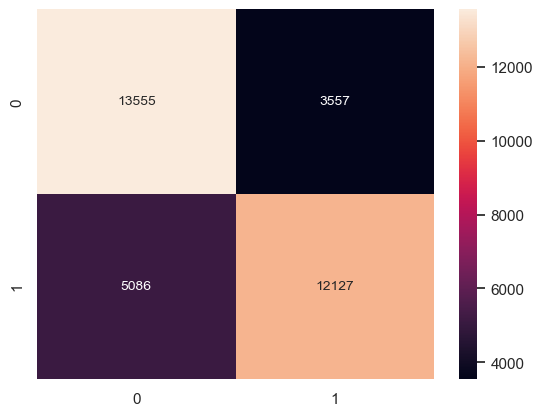

In [56]:
print("Training Accuracy \t:", primarytrainscore2)
sb.heatmap(confusion_matrix(y_train, y_pred_train_HGBC), annot = True, fmt=".0f", annot_kws={"size": 10})

Test Accuracy 	: 0.7322411800693359


<AxesSubplot:>

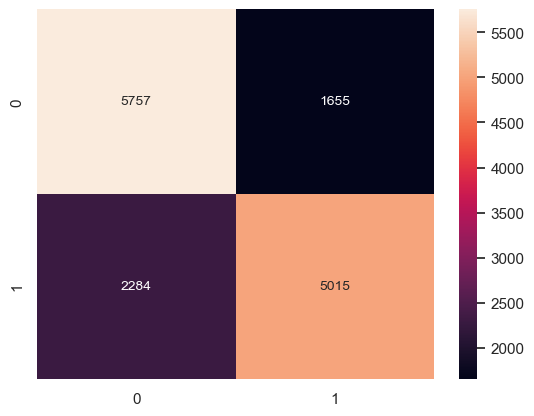

In [57]:
print("Test Accuracy \t:", primarytestscore2)
sb.heatmap(confusion_matrix(y_test, y_pred_test_HGBC), annot = True, fmt=".0f", annot_kws={"size": 10})

In [58]:
from sklearn.inspection import permutation_importance
result = permutation_importance(clf2, X_test, y_test, n_repeats=10, random_state=42)
df_importance2 = pd.DataFrame({"Feature": X.columns, "Importance": result.importances_mean})
df_importance2 = df_importance2.sort_values(by="Importance", ascending=False)

fig = px.bar(df_importance2, x="Importance", y="Feature", orientation='h', title='Feature Importances')
fig.show()

We can see that there is a decrease of accuracy between GBC and HGBC for the training set. But this can be due to a variaty of things. One such effects could be because of the variation of data that was selected. We have to compare other scores and accuracy as a whole.

### Comparison

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('[Train] Gradient Boosting Classifier:')
print('Accuracy:', accuracy_score(y_train, y_pred_train_GBC)) #Total prediction that is correct
print('Precision:', precision_score(y_train, y_pred_train_GBC)) #correctly predicted positive results out of all predicted positive results
print('Recall:', recall_score(y_train, y_pred_train_GBC)) #correctly predicted positive results out of all actual positive results
print('F1 Score:', f1_score(y_train, y_pred_train_GBC)) #Balance between Precision and Recall 2 * ((precision * recall) / (precision + recall))

print('\n[Train] Histogram-based Gradient Boosting Classifier:')
print('Accuracy:', accuracy_score(y_train, y_pred_train_HGBC))
print('Precision:', precision_score(y_train, y_pred_train_HGBC))
print('Recall:', recall_score(y_train, y_pred_train_HGBC))
print('F1 Score:', f1_score(y_train, y_pred_train_HGBC))

[Train] Gradient Boosting Classifier:
Accuracy: 0.8490021849963584
Precision: 0.8826335877862596
Recall: 0.806076802416778
F1 Score: 0.8426198645735281

[Train] Histogram-based Gradient Boosting Classifier:
Accuracy: 0.7482010196649672
Precision: 0.7732083652129559
Recall: 0.7045256492186138
F1 Score: 0.7372708757637474


In [61]:
print('[Test] Gradient Boosting Classifier:')
print('Accuracy:', accuracy_score(y_test, y_pred_test_GBC))
print('Precision:', precision_score(y_test, y_pred_test_GBC))
print('Recall:', recall_score(y_test, y_pred_test_GBC))
print('F1 Score:', f1_score(y_test, y_pred_test_GBC))

print('\n[Test] Histogram-based Gradient Boosting Classifier:')
print('Accuracy:', accuracy_score(y_test, y_pred_test_HGBC))
print('Precision:', precision_score(y_test, y_pred_test_HGBC))
print('Recall:', recall_score(y_test, y_pred_test_HGBC))
print('F1 Score:', f1_score(y_test, y_pred_test_HGBC))

[Test] Gradient Boosting Classifier:
Accuracy: 0.7252396166134185
Precision: 0.7446297130839717
Recall: 0.6791341279627346
F1 Score: 0.7103754657494984

[Test] Histogram-based Gradient Boosting Classifier:
Accuracy: 0.7322411800693359
Precision: 0.7518740629685158
Recall: 0.6870804219756131
F1 Score: 0.718018469468108


### Analysis
We can conclude that a HGBC is better at predicting 'Cardio' based on the test results.
Note that F1 score indicates the overall balance score between precision and recall and it is measure in range from 0 to 1.

0: Poor score for precision and recall.
1: perfect score for precision and recall.

So clearly, if we looked strictly down to the decimals, we have a slight advantage using HGBC which is expected consider the amount of numerical values we have in this dataset. 

With this, we can pass new data into a new variable e.g:
X_New and do a Y_pred_HGBC = boost.predict(X_new)

Y_pred_HGBC will return the outcome of 'cardio' being Yes: 1 or No: 0

With this done, we will bring this into main folder to compare it with the other Machine Learning Model. We should expect roughly similar results.